# Car Evaluation

> ## Business Problem: 

To classify a car as **acceptable** , **unacceptable** , **good** or **very good** based on its price , characterstics and maintenance cost

> ## Description : 

 - **Model concept structure**:

      
       Price                    overall price
       Maintenance Cost         price of the maintenance
       Number of Doors          number of doors
       Capacity                 capacity in terms of persons to carry
       Size of Luggage boot     the size of luggage boot
       safety                   estimated safety of the car

  
 - **Number of Instances**: 1728
   (instances completely cover the attribute space)

 - **Number of Attributes**: 6

 - **Attribute Values**:

       Price                   v-high, high, med, low
       Maintenance Cost        v-high, high, med, low
       Number of Doors         2, 3, 4, 5-more
       Capacity                2, 4, more
       Size of Luggage boot    small, med, big
       safety                  low, med, high

 - **Missing Attribute Values**: None

 - **Class Distribution (number of instances per class)**

       class      N          N[%]
       -----------------------------
       unacc     1210     (70.023 %) 
       acc        384     (22.222 %) 
       good        69     ( 3.993 %) 
       v-good      65     ( 3.762 %) 

> ## Approach : 

You will understand the dataset and build a model in the following stages: 

- **Data Specifications and Cleaning**
- **Exploratory Data Analysis**
      - Uni-Variate Analysis : Pie Charts
      - Bi-Variate Analysis : Stacked Bar Graphs , Viloin Plots and Box Plots
- **Data Processing , Label Encoding**
- **Data Splitting into Train and Test sets**
- **Modelling and Hypertuning**
      - KNN Classifier, HyperTuning
      - Random Forest, HyperTuning: Grid Search
- **Conclusion**

## `1` Data Specifications and Cleaning

**`1.1` Importing basic Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/kusht/Downloads/car_evaluation.csv',header=None)
# Assigning names to the columns in the dataset

data.columns = ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'safety', 'Decision']

# Original dataset doesnt have name so putting them manually

In [3]:
data.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**TASK : Print the shape of the dataset**

In [4]:
### START CODE HERE (~ 1 line of code)
data.shape
### END CODE HERE

(1728, 7)

**`1.2` Data Insights**

**TASK : Print information about dataset using `info()` method**

In [5]:
###ENTER CODE HERE (~ 1 line of code)
data.info()
###END CODE HERE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Price                   1728 non-null object
Maintenance Cost        1728 non-null object
Number of Doors         1728 non-null object
Capacity                1728 non-null object
Size of Luggage Boot    1728 non-null object
safety                  1728 non-null object
Decision                1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


**TASK: Describe the dataset using `describe` function**

In [6]:
###ENTER CODE HERE (~ 1 line of code)
data.describe()
###END CODE HERE 

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,5more,4,big,high,unacc
freq,432,432,432,576,576,576,1210


**TASK: Print counts of each value of each attribute using for loop and `value_counts()` method**

In [7]:
### START CODE HERE (~1 Line of code)
for i in data.columns : 
    print(data[i].value_counts())

### END CODE

vhigh    432
high     432
low      432
med      432
Name: Price, dtype: int64
vhigh    432
high     432
low      432
med      432
Name: Maintenance Cost, dtype: int64
5more    432
3        432
4        432
2        432
Name: Number of Doors, dtype: int64
4       576
2       576
more    576
Name: Capacity, dtype: int64
big      576
med      576
small    576
Name: Size of Luggage Boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64


Seeing the basic characterstics of the dataset you can now analyse whether the dataset is balanced , skewed , shape and make a model keep the following details in mind

**Analysis** : Data is balanced except the target feature i.e `Decision` which is **imblanced** and **skewed**

## `2` Exploratory Data Analysis 

After getting insight about the data , now you'll understand the data better by visualisations by doing Uni-Variate and Bi-Variate analysis

## `2.1` Uni-Variate Analysis

### - PIE CHARTS 

**TASK : Make `Pie chart` for `Decision`**

**HINT** : Figure out the sizes of each pie wedge by value_count of that instance . Use `value_counts()` to find sizes.

In [8]:
data.Decision.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64

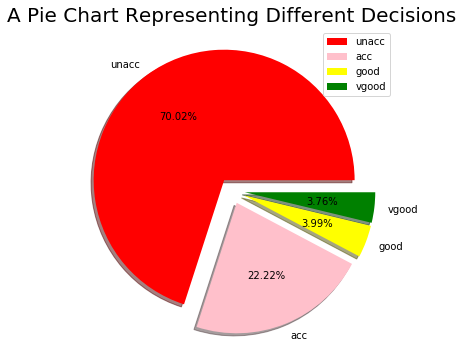

In [12]:
## Make a PIE chart of `decision`

## START CODE HERE : (FULL CODE , FILL THE PLACES WITH A SINGLE HASH)

# labels are names of elements in the feature that we want to ouput in the pie chart 
labels = ['unacc','acc','good','vgood']

# Colors provides the colors of the pie wedges
colors = ['red','pink','yellow','green']

# Size of pie wedges are given by using values from value_counts method which we acquired 
size = [1210,384,69,65]

# Explode provides the spacing between each pie wedge 
explode = [0.1, 0.1, 0.1, 0.1]

# Set the figure size to (6,6)
plt.rcParams['figure.figsize'] = (6,6)
# Plot Pie chart 
### autopct shows the percentage on each wedge 

# Use plt.pie and use the above set variables as arguments to create a pie chart 
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")

# Set Title , Axis = 'off' and Legend
plt.title('A Pie Chart Representing Different Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
    
# Show the plot 
plt.show()

### END CODE HERE

Analyse this graph and justify the imbalance with a suitable reason

**Analysis** : Most of the cars can be unaccountable due to having a small dataset

**TASK : MAKE A `PIE CHART` OF `Price`**

 - print the value counts of each element in attribute `Price` using `value_counts` method

In [11]:
###ENTER CODE HERE (~1 Line of code)
data.Price.value_counts()
###END CODE HERE

vhigh    432
high     432
low      432
med      432
Name: Price, dtype: int64

- Make similar <i>pie chart</i>  for `Price` 

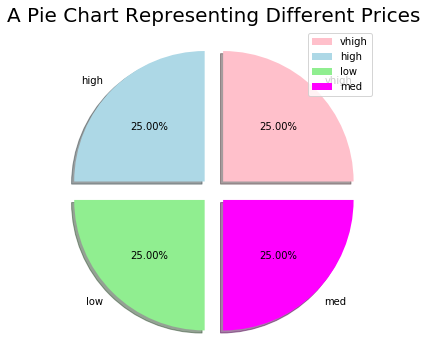

In [14]:
## PIE CHART OF 'PRICE'

### START CODE HERE : (FULL CODE)

labels = data.Price.value_counts().index
colors = ['pink', 'lightblue', 'lightgreen', 'magenta']
size = [432,432,432,432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (6,6)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Prices', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

### END CODE

##### GOOD WORK! 
However , its clearly visible that since all other attributes are also equally balanced , all the univariate visualisation would be same and of equally balanced classes , so percenatges would always be `33.3%` for three elements and `25%` for four elements in an attribute this completes Uni-Variate Analaysis and lets move on to Bi-Variate analysis to understand data better! 

## `2.2` Bi-Variate Analysis 

### - STACKED BAR GRAPH

**STACKED BAR GRAPH** is a very convenient and easy to understand visualisation for two categorical variables and to make them we'll use a important method from pandas , `crosstab` . The role of crosstab is to form a separate cross table between the given attributes where the values are frequencies/counts having the specific features of the attributes

**TASK : Understand `crosstab` function by making one between `Price` and `Decision`**

In [15]:
# An example of crosstab between price and decision : 
# Put the variables you want the crosstab between in place of '#'
pd.crosstab(data.Price,data.Decision)

Decision,acc,good,unacc,vgood
Price,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


**TASK  : Make `Stacked Bar Graph` between all attributes and `Decision` using for loop and crosstab function**

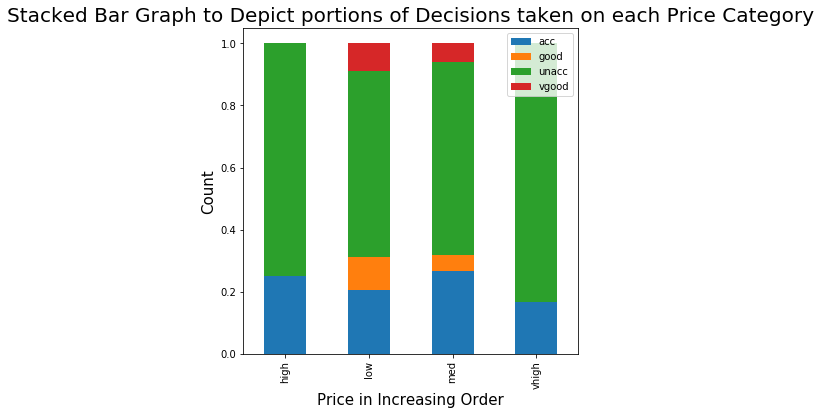

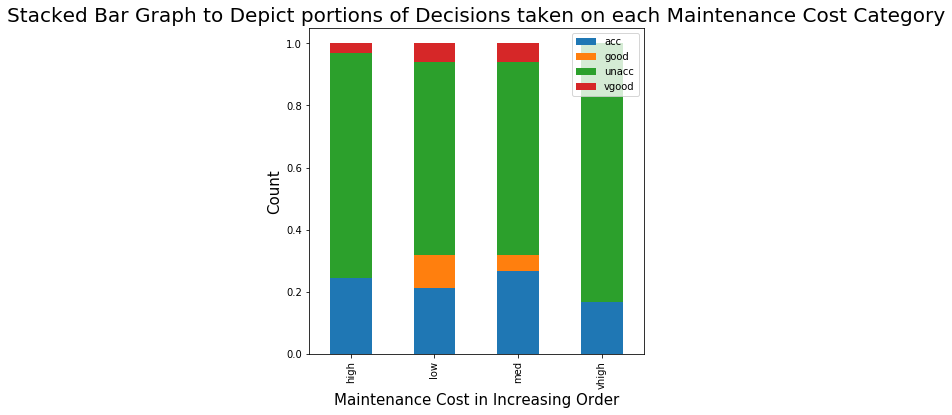

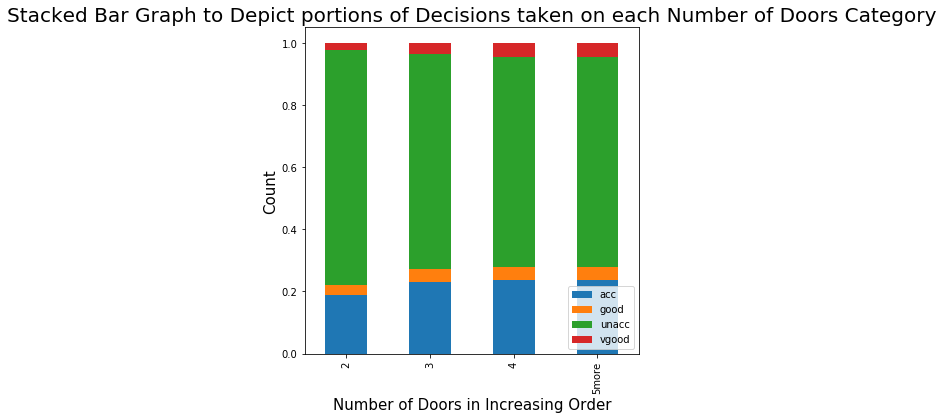

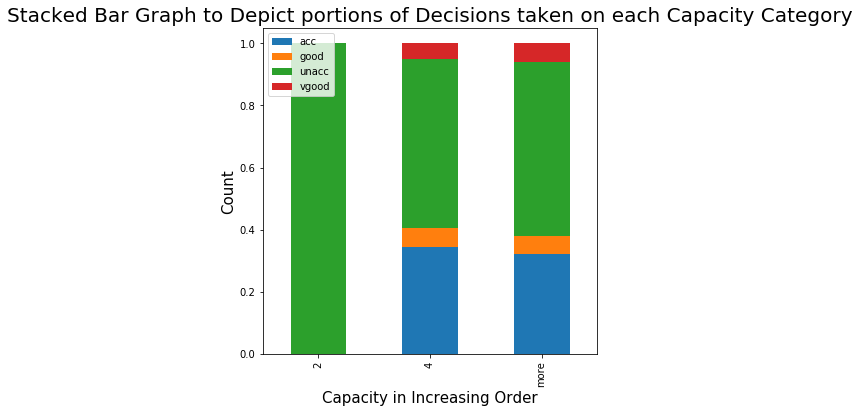

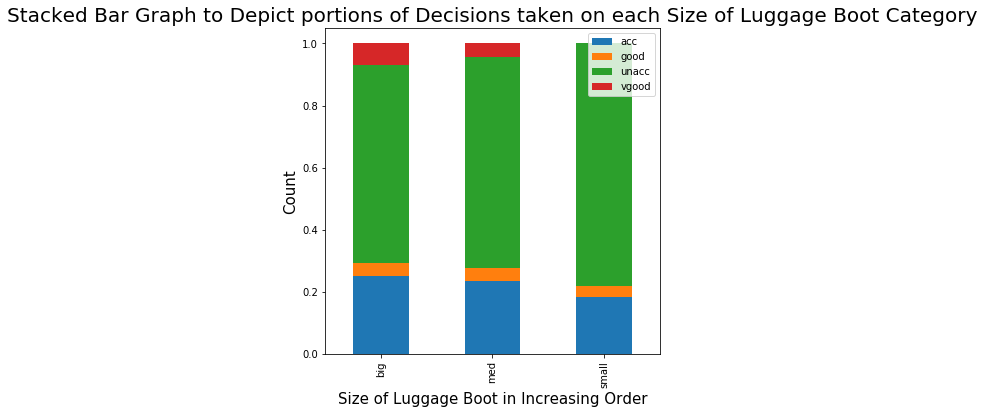

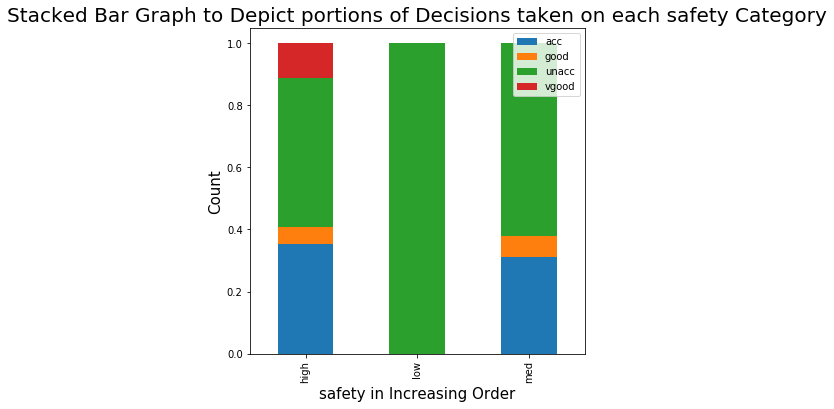

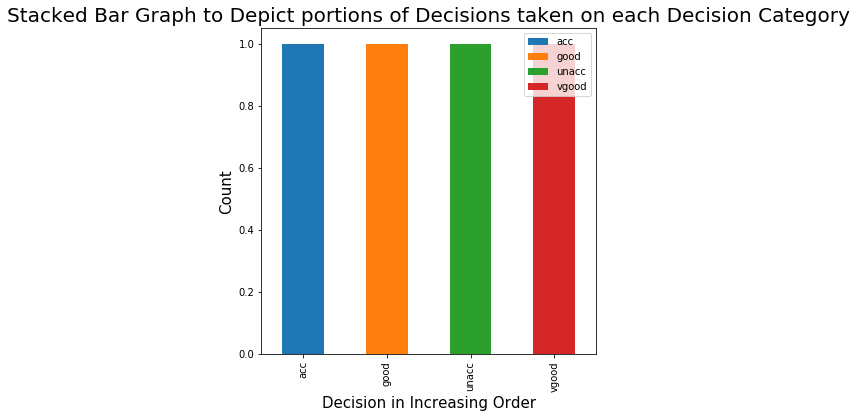

In [18]:
## Making STACKED BAR graphs between all attributes and 'decision'

for i in data.columns : 
    ## Write the variables for crosstab. 
    ## Remember one variable 'decision' is fixed and other variable 'i' gives the column names
    ctab = pd.crosstab(data[i],data.Decision)
    
    ## Dividing by sum to give range between 0 and 1
    ## Write the arguments of plot() in place of '#' . To create bar plot use kind='bar' and dont forget to keep stacked='True'
    ## Keep the size of bar as (6,6)
    ctab.div(ctab.sum(1).astype(float), axis = 0).plot(kind='bar' , stacked=True , figsize=(6,6))
    
    ## Write Title , labels and legend
    ## Use '{}.format()' function to write title corresponding to that each particular column
    plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each {} Category'.format(i), fontsize = 20)
    plt.xlabel('{} in Increasing Order'.format(i), fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.legend()
    plt.show()
 
    plt.show()

You can also do the above exercise manually writing individual plots for each attribute but for loop makes it very convenient and effortless

##### GOOD WORK! 
Now you have plotted stacked bar graphs of all attributes . Analyse it and gain insights about the data . Ahead you'll use another visualise technique called `VIOLIN PLOTS` but that visualisation is only for numerical attributes . So first use `labelencoder` or `hard code` by manually giving values to convert them to numerical attribute and then plot the violin plots

## `3` Data Processing 

### `3.1` Label encoding

Since all algorithms and many visualisations require numerical data. You have to convert all the categorical attributes into numerical ones. 

You can use `LabelEncoder()` directly or you can Hard Code them by individually giving values to each instance for each attribute. 
Hard coding is preferred as the values to be given and in which order are exactly known and the attributes and unique elements are less. LabelEncoder would encode the categorical data randomly.

**TASK  : Convert all the categorical attributes to numerical ones using  `LabelEncoder` or Manually `Hard Code` all the categorical attributes as per your choice**

In [22]:
### ENTER CODE HERE (FULL CODE)
data['Size of Luggage Boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
data.Decision.replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)
data['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)
data['Price'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
data['Maintenance Cost'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
data['Number of Doors'].replace('5more', 5, inplace = True)
data['Capacity'].replace('more', 5, inplace = True)

## Label Encoding

# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# data = le.fit_transform(data)

### END CODE HERE

##### GREAT! 
You're done with encoding , now check whether encoding has worked properly or not by seeing the dataset and by using `info()` method

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Price                   1728 non-null int64
Maintenance Cost        1728 non-null int64
Number of Doors         1728 non-null object
Capacity                1728 non-null object
Size of Luggage Boot    1728 non-null int64
safety                  1728 non-null int64
Decision                1728 non-null int64
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


As can be seen there are still attributes of `object` datatype which need to be converted to `int` datatype

**TASK  : Convert all attributes to `int`**

In [27]:
### START CODE HERE: 

data["Number of Doors"]=data["Number of Doors"].astype('int64',copy=False)
data.Capacity=data.Capacity.astype('int64')

### END CODE

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Price                   1728 non-null int64
Maintenance Cost        1728 non-null int64
Number of Doors         1728 non-null int64
Capacity                1728 non-null int64
Size of Luggage Boot    1728 non-null int64
safety                  1728 non-null int64
Decision                1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


### - Violin Plots and Box plots

`Violin plots` and `Box plots` are a great way to visualise numerical data. The plots conveniently gives us information such as : 
       
   - Median (a white dot on the violin plot and center line in box plot)
   - Interquartile range (the black bar in the center of violin and the boundaries of the box in box plot)
   - The lower/upper adjacent values (the black lines stretched from the bar) — defined as `first quartile — 1.5 IQR` and `third quartile + 1.5 IQR` respectively. These values can be used in a simple outlier detection technique (Tukey’s fences) — observations lying outside of these “fences” can be considered outliers.
   - The stretch in violin plots gives us the relative counts/frequencies of elements having that value

<img src="https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png">

**TASK : Make  `Violin Plots` between all attributes and `Decision`**

You now have to make violin plots of all attributes . Instead of manually writing the code everytime ,  use `for loop` again to ease out the process . Fill in the spaces where a single `#` is given 

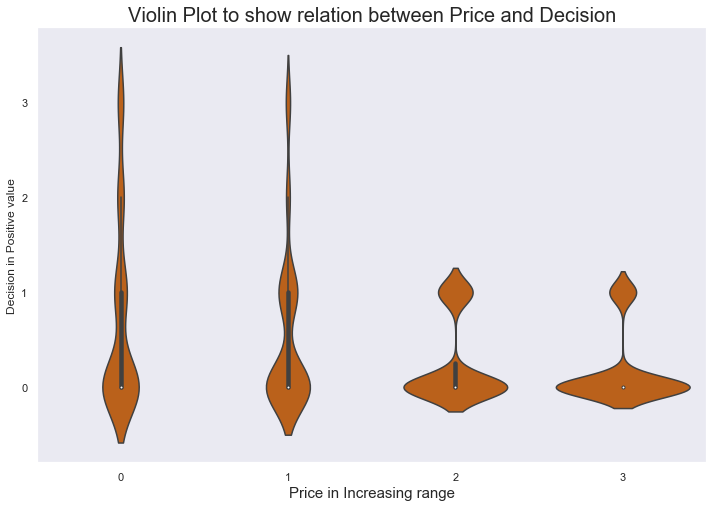

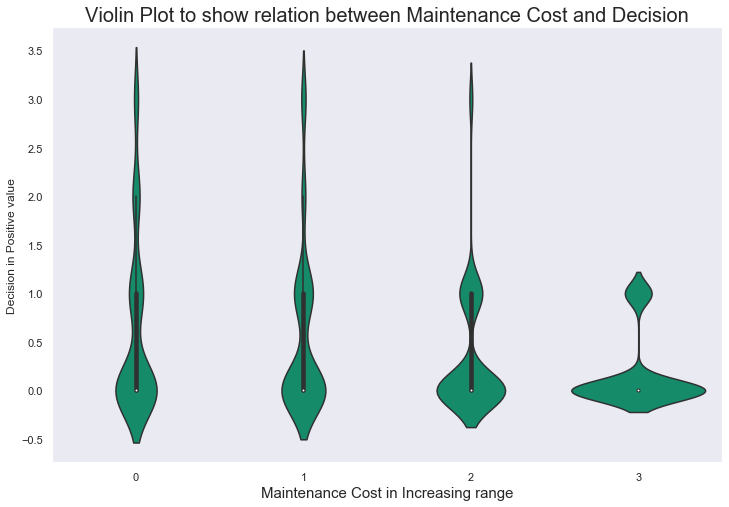

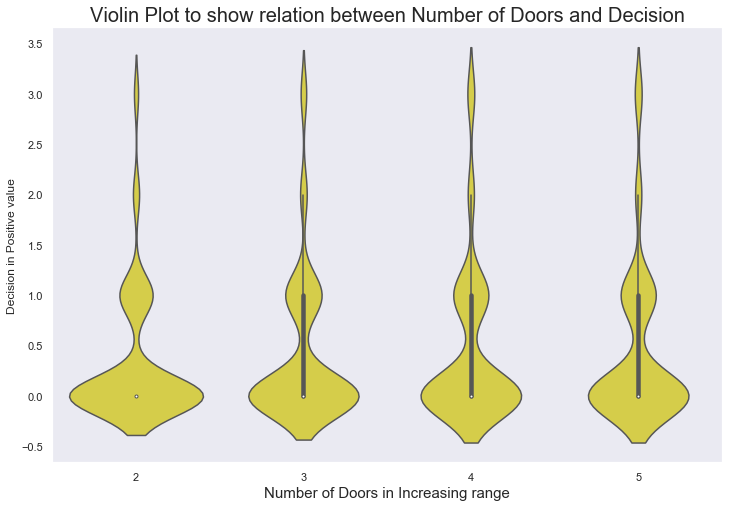

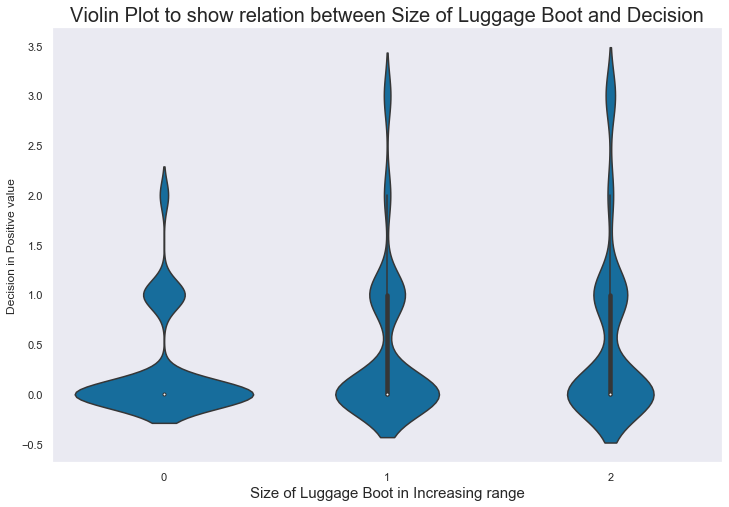

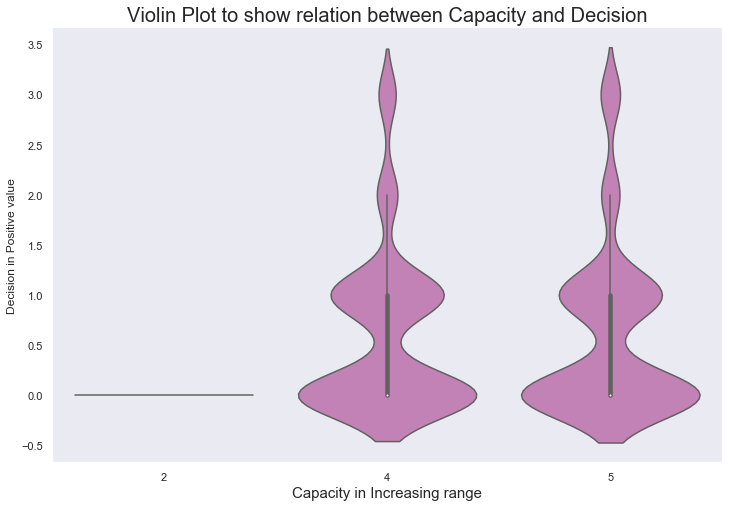

In [29]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
### START CODE HERE : 

## SET THE FIGURE SIZE USING PLT.RCPARAMS :
plt.rcParams['figure.figsize'] = (12, 8)

## SET 5 COLORS OF YOUR CHOICE 
color = ['r','g','y','b','m']

## PLOT VILOIN PLOTS FOR ALL ATTRIBUTES EXCEPT 'SAFETY'
## CREATE A VARIABLE 'COLS' HAVING ALL COLUMN NAMES EXCEPT 'SAFTEY'

cols = ['Price' , 'Maintenance Cost' , 'Number of Doors' , 'Size of Luggage Boot','Capacity']

## FOR LOOP : 
for c,i in zip(color,cols) : 
    ## WRITE CODE FOR VIOLIN PLOT IN THE VARIABLE 'AX' 
    ## REMEMBER TO PUT 'COLOR' ARGUMENT = c 
    ax = sns.violinplot(x = data[i], y = data['Decision'], color = c)
    ax.set_title('Violin Plot to show relation between {} and Decision'.format(i), fontsize = 20)
    ax.set_xlabel('{} in Increasing range'.format(i), fontsize = 15)
    ## SET THE YLABEL TO 'Decision'
    ax.set_ylabel('Decision in Positive value')
    plt.show()    

**TASK : PLOT `BOXPLOT`**

Plot boxplot in the similar way using almost the same code as for previous viloin plots but instead of `sns.violinplot` , use `sns.boxplot` . Create a boxplot betweeen **Safety-Decision** : 

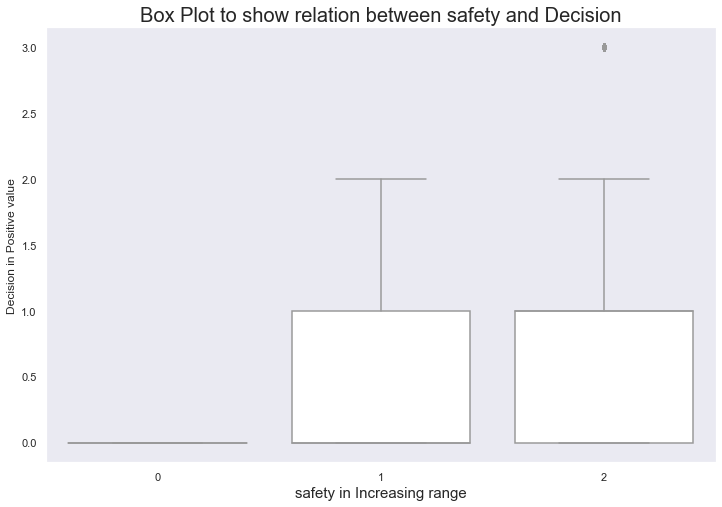

In [30]:
### START CODE HERE (FULL CODE)
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.boxplot(x = data['safety'], y = data['Decision'], color = 'w')
ax.set_title('Box Plot to show relation between safety and Decision', fontsize = 20)
ax.set_xlabel('safety in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive value')
plt.show()

### END CODE HERE

Understand the Violin plots and box plots to gain better insight about data

### `3.2` CORREALTION MATRIX

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses

**TASK : Make a `Correlation Matrix` using `corr()` and make it visually aesthetic using `sns.heatmap`**

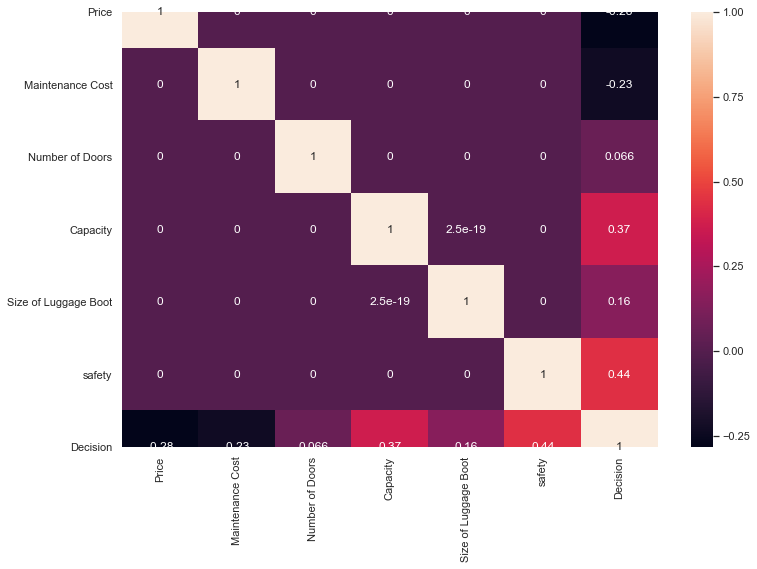

In [33]:
### START CODE HERE  : (~1 Line of code)
sns.heatmap(data.corr(),annot=True)
### END CODE  

##### Great!! 
Its clearly visible since there is no proper co relation between any of the attributes except `decision` prompts that there is no use to do `multi variate analysis` so you've successfully completed the different analysis of data and gained all the information . Now its time to make a model based on the information. For that split the data into train and test set and then make a model on it 

## `4`  Data Split into Train and Test Set  

**TASK  : Split the data into dependent and independent variables and print their shapes**

In [34]:
### Splitting the dataset into dependent and independent variables

## START CODE HERE : (~ 2 Lines of code)
X=data[data.columns[:-1]]
y=data['Decision']
### END CODE

In [35]:
X

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1
...,...,...,...,...,...,...
1723,0,0,5,5,1,1
1724,0,0,5,5,1,2
1725,0,0,5,5,2,0
1726,0,0,5,5,2,1


In [36]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: Decision, Length: 1728, dtype: int64

**TASK  : Split the data into train and test sets with test size=0.15, random state = 0 and print their shapes**

In [39]:
## Splitting the dataset into train and test sets
## Import the required Library 

from sklearn.model_selection import train_test_split

### START CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

### END CODE 

Shape of x_train:  (1468, 6)
Shape of y_train:  (1468,)
shape of x_test:  (260, 6)
shape of y_test:  (260,)


## `5`  Creating a model

Youll be creating models based on two algorithms : 
 - **KNN CLassifier**
 - **Random Forest** 

followed by which , model would be improved via `HyperTuning` and finally you'll analyse and choose the best model 

### `5.1` KNN Classifier 

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems . The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other , "Birds of a feather flock together" .

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/Map1NNReducedDataSet.png">

So as can be seen from the image , it forms boundaries of different classes and elements are classified based on which class they lie on

**TASK : Make a `KNN classifier model` and print `train and test accuracy` along with `confusion matrix`**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Make a KNN MODEL : 

### START CODE HERE : 

## CRreating a model :

model = KNeighborsClassifier(n_jobs=-1)
## Fit : 
# fit the model on x_train and y_train 
model.fit(X_train,y_train)
# Predict the values for x_test using predict() method and put it in a variable 'y_pred'
y_pred=model.predict(X_test)
# Print the training and testing accuracy :
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))
# printing the confusion Matrix : 
cm = confusion_matrix(y_test, y_pred)
print(cm)
### END CODE HERE : 

Training Accuracy:  0.9822888283378747
Testing Accuracy:  0.9461538461538461
[[180   4   0   0]
 [  4  52   3   0]
 [  0   2   9   0]
 [  0   1   0   5]]


**Does high accuracy mean that this model is a good predictor?**

Even a high accuracy doesnt necesssarily imply that its a great model especially with `Imbalanced Multiclass Classification` , Accuracy might give misleading results as model might be predicting everything as `unacc` in this case and since majority of the elements actually give the value `unacc` , accuracy is bound to be high but this does not mean the model is good predictor. So you have to analyse it using other measures like `F1 scores` , `Precision` , `Recall`

For a better understand the definitive formulas for precision , recall and F1 scores are: 

<img src="https://miro.medium.com/max/2000/1*6NkN_LINs2erxgVJ9rkpUA.png">

<img src="https://miro.medium.com/max/752/1*UJxVqLnbSj42eRhasKeLOA.png">

`True Positives` , `False positives` and `False negatives` are found out using the earlier calculated confusion matrix

<img src="https://miro.medium.com/max/1400/1*CPnO_bcdbE8FXTejQiV2dg.png"> 

The significance of each parameters are basically , while `recall` expresses the ability to find all relevant instances in a dataset, `precision` expresses the proportion of the data points our model says was relevant actually were relevant. So a high recall score means that we're operating on relevant instances in the dataset and high `precision` means more are the relevant instances which our model predicted to be relevant and thus high precision and recall generally gives high F1 Score which is favorable. 

**TASK : Make a `Classification Report` to properly assess the models performance**

In [43]:
### START CODE HERE (~1 Line of code)
print(classification_report(y_test,y_pred))
### END CODE HERE

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.88      0.88      0.88        59
           2       0.75      0.82      0.78        11
           3       1.00      0.83      0.91         6

    accuracy                           0.95       260
   macro avg       0.90      0.88      0.89       260
weighted avg       0.95      0.95      0.95       260



#### KNN HYPERTUNING 
Now try to gain more accuracy by hypertuning the parameter `Number of Neighbors`

You have to find the best hyperparameter by using the following code below. Though its advised not to lose for loops as computation speed is slower however to visualise the scores we're gonna use them. 
This can also be done with `GridSearch` which we'll explore in the next model 

**TASK : Use for loop to give values to `n_neighbors` from 2 to 30 and calculate average `cross validation score` for each of them**

In [48]:
### START CODE HERE : 

## IMPORT LIBRARY FOR CROSS_VAL_SCORE: 
from sklearn.model_selection import cross_val_score
avg_score=[]
for k in range(2,30):
    # PUT ARGUMENTS OF n_jobs and n_neighbors
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    ## CALCULATE CROSS_VAL_SCORE with cv=5 and scoring='accuracy' and store it in variable 'score' : 
    score=cross_val_score(knn,X_train,y_train,n_jobs=-1,cv=5,scoring='accuracy')
    avg_score.append(score.mean())

### END CODE

**TASK : Plot the average scores of all `k's`**

Text(0, 0.5, 'accuracy')

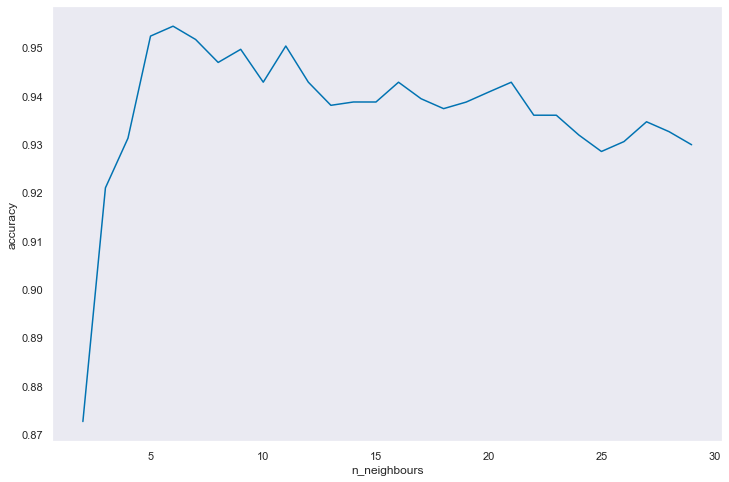

In [49]:
### STRART CODE HERE: 

## Set the figure size to (12,8)
plt.figure(figsize=(12,8))
# Plot the figure using plt.plot() where x values are range(2,30) and y values the average scores :
plt.plot(range(2,30),avg_score)
# Keep the xlabel as n_neighbours and ylabel as accuracy
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
### END CODE

Analyse the curve and extract the `Top 2 highest accuracies` values for n_neighbors

In [51]:
avg_score

[0.8726579118823338,
 0.9209600108075824,
 0.9312269386549756,
 0.9523271565623551,
 0.9543726165462282,
 0.9516258460869226,
 0.9468801940448577,
 0.949592042549255,
 0.9428008357558996,
 0.9502746047628647,
 0.9427985456511332,
 0.9380179716541599,
 0.9387051775251125,
 0.9387029505447178,
 0.9427915484412143,
 0.9393785632555556,
 0.9373307815238705,
 0.9386866820842149,
 0.9407576975198382,
 0.9427869206862539,
 0.9359725906970405,
 0.9359678996559895,
 0.9318722888089109,
 0.9284754455115733,
 0.9305209686198183,
 0.9346165794668968,
 0.9325711039040796,
 0.9298662837674891]

k=6 has highest accuracy of ` 0.9543726165462282` followed closely by 
k=5 having accuracy of `0.9523271565623551` so lets take k=5 and k=6 for consideration

**TASK : Calculate `Accuracy` and  `F1 score` for both the values of n_neighbors**

In [52]:
### START CODE HERE : (FULL CODE)

knn_5 = KNeighborsClassifier(n_jobs=-1 , n_neighbors=5)
knn_5.fit(X_train,y_train)
print(classification_report(y_test,knn_5.predict(X_test)))

### END CODE 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.88      0.88      0.88        59
           2       0.75      0.82      0.78        11
           3       1.00      0.83      0.91         6

    accuracy                           0.95       260
   macro avg       0.90      0.88      0.89       260
weighted avg       0.95      0.95      0.95       260



In [53]:
knn_6 = KNeighborsClassifier(n_jobs=-1 , n_neighbors=6)
knn_6.fit(X_train,y_train)
print(classification_report(y_test,knn_6.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       184
           1       0.90      0.90      0.90        59
           2       0.78      0.64      0.70        11
           3       1.00      0.83      0.91         6

    accuracy                           0.95       260
   macro avg       0.91      0.84      0.87       260
weighted avg       0.95      0.95      0.95       260



They only have a small difference in accuracy but the difference is huge in F1-score and recall in favor of k=5 so our best model is with n_neighbors=5

Analyse both the models and choose the best one and write their characterstics here in the blank spaces : 

 - **Optimised KNN model : n_neighbors = 5**
 - **Accuracy ~ `95.2 %`**
 - **F1 Score ~ `89 %`**

This will further clear your understanding that better accuracy doesnt necessarily mean better F1 score or better model. One has to analyse everything before finalising a model

### `5.2` Random Forest

To understand Random forest classifier , lets first get a brief idea about `Decision Trees` in general. 
Decision Trees are very intuitive and at everyone have used this knowingly or unknowingly at some point . Basically the model keeps sorting them into categories forming a large tree by responses of some questons (decisions) and thats why its called decision tree. An image example would help understand it better : 

<img src="https://miro.medium.com/max/1000/1*LMoJmXCsQlciGTEyoSN39g.jpeg">

`Random Forest` : Random forest, like its name implies, consists of a large number of individual decision trees that operate as an [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning) . Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. 

<img src="https://miro.medium.com/max/1000/1*VHDtVaDPNepRglIAv72BFg.jpeg"> 

The fundamental concept is  large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. Since this dataset has very low correlation between attributes , random forest can be a good option. 

**TASK : Make a Random forest Classifier and print the `Accuracy` and `F1 score`**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# This allows to use f1_score() function directly

### START YOUR CODE HERE : (FULL CODE)
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='macro'))
### END CODE

C:\Users\kusht\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9576923076923077
0.8782824550870549


The accuracy and F1 score is the base model measures and now you will hypertune it using `GridSearch` to make it a better model 

**Random Forest HyperTuning : Grid Search** 

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions. It builds a model for every combination of hyperparameters specified and evaluates each model. A more efficient technique for hyperparameter tuning is the Randomized search — where random combinations of the hyperparameters are used to find the best solution. However , if its a small sample like the current dataset then gridsearch is also fine. 

**TASK : Do a `GridSearch` and print the best hyperparameters for this random forest classifier**

In [56]:
### Import the required library : 
from sklearn.model_selection import GridSearchCV
### START YOUR CODE HERE (FULL CODE)
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

grid.fit(X_train,y_train)

### END CODE HERE 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criteri

In [57]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': None}
0.9850136239782016


**TASK  : Print the `Accuracy` , `Precision` , `Recall` and `F1 Score` for the optimised Random forest model and compare with previous models** 

In [62]:
### START CODE HERE : (FULL CODE)
rf_optimised_model = grid.best_estimator_

y_pred=rf_optimised_model.predict(X_test)
print(classification_report(y_test,y_pred))
### END CODE HERE

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       184
           1       0.95      0.93      0.94        59
           2       0.79      1.00      0.88        11
           3       0.83      0.83      0.83         6

    accuracy                           0.97       260
   macro avg       0.89      0.94      0.91       260
weighted avg       0.98      0.97      0.97       260



#### AWESOME! 
Now , you are completely done with `Modelling` and `Hypertuning the Parameters` . The last thing thats left is to write a conclusion stating which model is the best and its different scores and that finishes this project. 

## `6` Conclusion

Random Forest clubbed with GridSearch hypertuning gives the best model with an accuracy of `97 %` and F1 score of `91 %` 